# Project of SD-TSIA210

## Step 1 - Clustering, Dimension Reduction, Interpretation

### 1. Load data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
def read_data(filename: str):
    df = pd.read_csv(filename)
    return df

In [3]:
events = read_data("data/EVENTS.csv")
# to see first 5 lines
events.head(5)

,id,title,createdAt,updatedAt,startAt,endAt,enabled,lat,lng,fullAddress,link,url,body,authorId,authorType,authorZipCode
0,RXZlbnQ6MTc1NjE2ZDYtMWE2My0xMWU5LTk0ZDItZmExNj...,Réunion à la participation citoyenne pour le G...,2019-01-17 15:20:50,2019-02-25 17:07:49,2019-03-02 18:30:00,2019-03-02 23:00:00,True,43.620069,1.470152,"Maison de la Citoyenneté de Toulouse Est, Quar...",NaN,https://granddebat.fr/events/reunion-a-la-part...,<p><em>L’exactitude des informations ci-dessou...,VXNlcjo1MjY0ZDRhMi0xOTkxLTExZTktOTRkMi1mYTE2M2...,Élu / élue et Institution,31500
1,RXZlbnQ6MTc1NzUzMjUtMmJhMi0xMWU5LWJmNTYtZmExNj...,Grand débat des entreprises,2019-02-08 14:04:38,2019-02-08 14:04:38,2019-03-04 18:30:00,2019-03-04 22:00:00,True,44.988127,4.976960,"1, rue Marc Seguin, 26300 ALIXAN",NaN,https://granddebat.fr/events/grand-debat-des-e...,“<i>L’exactitude des informations ci-dessous r...,VXNlcjpiYjc3NDFkOC0yYWRiLTExZTktOTRkMi1mYTE2M2...,Élu / élue et Institution,26000
2,RXZlbnQ6MTc1OTk3MzYtMmY3ZC0xMWU5LWJmNTYtZmExNj...,Club du 3ème âge,2019-02-13 11:49:52,2019-02-13 11:49:51,2019-02-22 14:00:00,2019-02-22 17:30:00,True,49.211872,-0.378057,"Maison de Quartier, Place Dom Aubourg, 14000 CAEN",NaN,https://granddebat.fr/events/club-du-3eme-age,“<i>L’exactitude des informations ci-dessous r...,VXNlcjo2Y2NhNzhhOC0yZWE1LTExZTktYmY1Ni1mYTE2M2...,Organisation à but non lucratif,14000
3,RXZlbnQ6MTc1Y2E2YmMtMzQzOC0xMWU5LWJmNTYtZmExNj...,Grand débat national GAGNY,2019-02-19 12:18:32,2019-02-19 12:18:32,2019-02-25 19:00:00,2019-02-25 21:00:00,True,48.894931,2.538318,"Club Paul Éluard, 18 bis allée des Chênes, 932...",NaN,https://granddebat.fr/events/grand-debat-natio...,“<i>L’exactitude des informations ci-dessous r...,VXNlcjo4NmI2NzQ4OS0xYmNjLTExZTktOTRkMi1mYTE2M2...,Organisation à but non lucratif,93220
4,RXZlbnQ6MTc2NTVjZjYtMmJhMi0xMWU5LWJmNTYtZmExNj...,débat sur l'organisation de l'Etat et des serv...,2019-02-08 14:04:38,2019-02-08 14:04:38,2019-03-05 20:00:00,2019-03-05 22:00:00,True,47.122187,6.197913,"à la mairie de Saules, 25580 Saules",NaN,https://granddebat.fr/events/debat-sur-lorgani...,“<i>L’exactitude des informations ci-dessous r...,VXNlcjo0Y2I5MDc2ZS0yYWU1LTExZTktOTRkMi1mYTE2M2...,Élu / élue et Institution,25580


In [4]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9975 entries, 0 to 9974
Data columns (total 16 columns):
id               9975 non-null object
title            9975 non-null object
createdAt        9975 non-null object
updatedAt        9975 non-null object
startAt          9975 non-null object
endAt            9138 non-null object
enabled          9975 non-null bool
lat              9918 non-null float64
lng              9918 non-null float64
fullAddress      9969 non-null object
link             534 non-null object
url              9975 non-null object
body             9973 non-null object
authorId         9975 non-null object
authorType       8426 non-null object
authorZipCode    9975 non-null int64
dtypes: bool(1), float64(2), int64(1), object(12)
memory usage: 1.2+ MB


In [21]:
events["authorType"].value_counts()

Élu / élue et Institution          4249
Citoyen / Citoyenne                2510
Organisation à but non lucratif    1550
Organisation à but lucratif         117
Name: authorType, dtype: int64

In [7]:
events[["lat", "lng", "authorZipCode"]].describe()

,lat,lng,authorZipCode
count,9918.000000,9918.000000,9.975000e+03
mean,46.111469,2.593467,5.431675e+04
std,6.826882,13.148875,8.333880e+04
min,-37.840477,-149.304113,0.000000e+00
25%,44.885970,0.743142,3.013100e+04
50%,47.362830,2.398454,5.500000e+04
75%,48.829407,4.835877,7.501400e+04
max,64.146778,174.771111,6.209301e+06


### 2. Visualisation of data

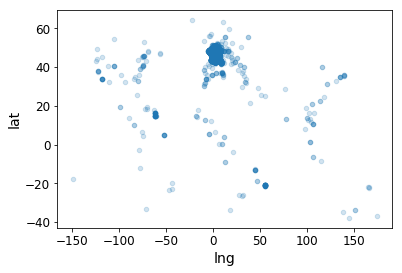

In [17]:
events.plot(kind="scatter", x="lng", y="lat", alpha=0.2)

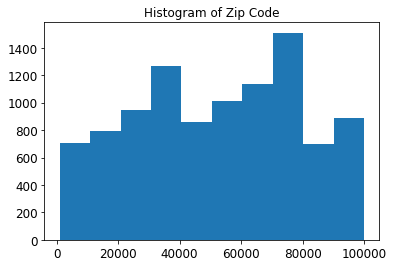

In [19]:
# drop bad values of zip codes 
events_zip_code = events [ (events["authorZipCode"] < 100000) & ( events["authorZipCode"] > 1000)]
plt.hist(events_zip_code["authorZipCode"])
plt.title("Histogram of Zip Code") 
plt.show()

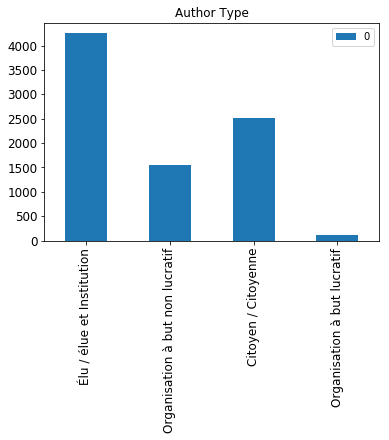

In [23]:
from collections import Counter
events_no_nan_authorType = events.dropna(subset=["authorType"]) 
authorType_counts = Counter(events_no_nan_authorType["authorType"])
df_authorType = pd.DataFrame.from_dict(authorType_counts, orient='index')
df_authorType.plot(kind='bar')
plt.title("Author Type")
plt.show()

### 3. Drop columns

In [4]:
# useless features
events_new = events.drop(["id", "enabled", "link", "url", "body", "authorId", "fullAddress"], axis=1) # drop labels for training set
# drop bad zip code
events_new = events_new [ (events_new["authorZipCode"] < 100000) & ( events_new["authorZipCode"] > 1000)]
events_new.head()

,title,createdAt,updatedAt,startAt,endAt,lat,lng,authorType,authorZipCode
0,Réunion à la participation citoyenne pour le G...,2019-01-17 15:20:50,2019-02-25 17:07:49,2019-03-02 18:30:00,2019-03-02 23:00:00,43.620069,1.470152,Élu / élue et Institution,31500
1,Grand débat des entreprises,2019-02-08 14:04:38,2019-02-08 14:04:38,2019-03-04 18:30:00,2019-03-04 22:00:00,44.988127,4.976960,Élu / élue et Institution,26000
2,Club du 3ème âge,2019-02-13 11:49:52,2019-02-13 11:49:51,2019-02-22 14:00:00,2019-02-22 17:30:00,49.211872,-0.378057,Organisation à but non lucratif,14000
3,Grand débat national GAGNY,2019-02-19 12:18:32,2019-02-19 12:18:32,2019-02-25 19:00:00,2019-02-25 21:00:00,48.894931,2.538318,Organisation à but non lucratif,93220
4,débat sur l'organisation de l'Etat et des serv...,2019-02-08 14:04:38,2019-02-08 14:04:38,2019-03-05 20:00:00,2019-03-05 22:00:00,47.122187,6.197913,Élu / élue et Institution,25580


### 4. Transformation of data

In [ ]:
# transform date
# add duration

In [5]:
events_new = events_new.dropna(subset=["createdAt", "updatedAt", "startAt", "endAt"])

In [6]:
# transform the date to timestamp
events_new["createdAt"] = pd.to_datetime(events_new["createdAt"])
first_time = events_new["createdAt"].min()
events_new["createdAt"] = (events_new["createdAt"] - first_time)  / np.timedelta64(1,'s')

events_new["updatedAt"] = pd.to_datetime(events_new["updatedAt"])    
events_new["updatedAt"] = (events_new["updatedAt"] - first_time)  / np.timedelta64(1,'s')

events_new["startAt"] = pd.to_datetime(events_new["startAt"])    
events_new["startAt"] = (events_new["startAt"] - first_time)  / np.timedelta64(1,'s')

events_new["endAt"] = pd.to_datetime(events_new["endAt"])    
events_new["endAt"] = (events_new["endAt"] - first_time)  / np.timedelta64(1,'s')

In [7]:
# add duration to the data set
events_new["duration"] = events_new["endAt"] - events_new["startAt"]

In [59]:
events_new.head()

,title,createdAt,updatedAt,startAt,endAt,lat,lng,authorType,authorZipCode,duration
0,Réunion à la participation citoyenne pour le G...,140384.0,3516403.0,3953334.0,3969534.0,43.620069,1.470152,Élu / élue et Institution,31500,16200.0
1,Grand débat des entreprises,2036612.0,2036612.0,4126134.0,4138734.0,44.988127,4.976960,Élu / élue et Institution,26000,12600.0
2,Club du 3ème âge,2460526.0,2460525.0,3245934.0,3258534.0,49.211872,-0.378057,Organisation à but non lucratif,14000,12600.0
3,Grand débat national GAGNY,2980646.0,2980646.0,3523134.0,3530334.0,48.894931,2.538318,Organisation à but non lucratif,93220,7200.0
4,débat sur l'organisation de l'Etat et des serv...,2036612.0,2036612.0,4217934.0,4225134.0,47.122187,6.197913,Élu / élue et Institution,25580,7200.0


In [ ]:
# transform titles to vectors of words
# a clustering with vectors of words

In [8]:
"""
Keams text clustering with TF-IDF features
"""

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import FrenchStemmer
import string
import stop_words
from sklearn.cluster import KMeans

def get_stop_words():
    custom_stop_words = set(stopwords.words('french') +
                            list(string.punctuation) +
                            stop_words.get_stop_words('fr'))
    return custom_stop_words


def tokenize(text):
    stemmer = FrenchStemmer()
    words_temp = word_tokenize(text, language='french')
    wordss = [stemmer.stem(word) for word in words_temp]
    return wordss

answers = events_new['title']
answers = answers.str.lower()
answers = answers.values.tolist()


custom_stop_words = get_stop_words()
vectorizer = TfidfVectorizer(stop_words=custom_stop_words,
                            tokenizer=tokenize,
                            max_features=100)

X = vectorizer.fit_transform(answers)
words = vectorizer.get_feature_names()


kmeans = KMeans(n_clusters=8, n_init=20)
kmeans.fit(X)

    # Finally, we look at the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:, -1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

/home/pepper/Documents/WorkSpace/python3environment/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``', 'alor', 'aur', 'aurion', 'auron', 'auss', 'autr', 'avi', 'avion', 'avon', 'ayon', 'cec', 'cel', 'chaqu', 'comm', 'dan', 'dedan', 'dehor', 'devr', 'devrion', 'devron', 'droit', 'e', 'encor', 'euss', 'eussion', 'eûm', 'fair', 'forc', 'fuss', 'fussion', 'fûm', 'hor', 'just', 'mainten', 'moin', 'mêm', 'nomm', 'notr', 'parc', 'parol', 'person', 'san', 'ser', 'serion', 'seron', 'seul', 'somm', 'soyon', 'tand', 'tel', 'tres', 'votr', 'éti', 'étion', 'ête'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


0 : débat, grand, démocrat, citoyennet, public, national, fiscal, servic, organis, dan, dépens, franc, ’, publiqu, parol, particip, conseil, ``, ateli, jeun, '', commun, contribu, déput, them
1 : national, débat, grand, contribu, parol, particip, rencontr, organis, ateli, vill, dan, saint, commun, publiqu, franc, citoyennet, ’, reunion, démocrat, d'échang, them, caf, servic, fiscal, 4
2 : citoyen, débat, grand, réunion, rencontr, national, consult, concert, parol, organis, caf, ateli, saint, déput, particip, dan, démocrat, local, échang, cadr, collect, contribu, reunion, conseil, proposit
3 : débat, grand, franc, particip, débattr, démocrat, dépens, déput, développ, echang, ecolog, ensembl, entre, ’, entrepris, jaun, fair, famill, femm, fiscal, févri, gilet, habit, handicap, exprim
4 : local, d'initi, réunion, débat, grand, national, reunion, citoyen, cadr, dan, initi, démocrat, organis, publiqu, saint, déput, citoyennet, debat, vill, propos, commun, quarti, ’, écolog, transit
5 : deba

In [ ]:
# TODO transform authorType to onehot code

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
events_new = events_new.dropna(subset=["authorType"]) 

authorType = np.array(events_new['authorType'])
print(authorType)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(authorType)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

['Élu / élue et Institution' 'Élu / élue et Institution'
 'Organisation à but non lucratif' ... 'Organisation à but non lucratif'
 'Citoyen / Citoyenne' 'Élu / élue et Institution']
[3 3 2 ... 2 0 3]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


/home/pepper/Documents/WorkSpace/python3environment/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [10]:
onehot_encoded = np.asarray(onehot_encoded)
events_new = events_new.drop("authorType", axis=1)
events_new["authorType0"] = onehot_encoded[:, 0]
events_new["authorType1"] = onehot_encoded[:, 1]
events_new["authorType2"] = onehot_encoded[:, 2]
events_new["authorType3"] = onehot_encoded[:, 3]

In [11]:
events_new.head()

,title,createdAt,updatedAt,startAt,endAt,lat,lng,authorZipCode,duration,authorType0,authorType1,authorType2,authorType3
0,Réunion à la participation citoyenne pour le G...,140384.0,3516403.0,3953334.0,3969534.0,43.620069,1.470152,31500,16200.0,0.0,0.0,0.0,1.0
1,Grand débat des entreprises,2036612.0,2036612.0,4126134.0,4138734.0,44.988127,4.976960,26000,12600.0,0.0,0.0,0.0,1.0
2,Club du 3ème âge,2460526.0,2460525.0,3245934.0,3258534.0,49.211872,-0.378057,14000,12600.0,0.0,0.0,1.0,0.0
3,Grand débat national GAGNY,2980646.0,2980646.0,3523134.0,3530334.0,48.894931,2.538318,93220,7200.0,0.0,0.0,1.0,0.0
4,débat sur l'organisation de l'Etat et des serv...,2036612.0,2036612.0,4217934.0,4225134.0,47.122187,6.197913,25580,7200.0,0.0,0.0,0.0,1.0


### 5. Normalization and Standarlization

In [ ]:
from sklearn.preprocessing import StandardScaler
 scaler = StandardScaler() 
scaled_data = scaler.fit_transform(data)

### not used for now

In [ ]:
import pathlib
import itertools
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from stop_words import get_stop_words
import matplotlib.pyplot as plt




def get_responses(df: pd.DataFrame):
    """ Extract responses and return a pd.DataFrame
    with columns: authorId, questionId, formattedValue

    Args:
        df: dataframe from read_data

    Returns:
        pd.DataFrame with responses
    """
    responses = []
    for i, x in df.iterrows():
        df_tmp = (pd.DataFrame(x.responses).
                  filter(['questionId', 'formattedValue']).
                  assign(authorId=x.authorId))
        responses.append(df_tmp)

    return pd.concat(responses, ignore_index=True)

def extract_responses_by_id(responses: list, key: str='138'):
    """ Extract a specific question

    Args:
        responses: list (example df.iloc[0].responses)
        key: questionId (example '142')

    Returns:
        responses as a string
    """

    response = [x['formattedValue'] for x in responses
                if x['questionId'] == key]
    if len(response):
        return response[0]
    else:
        return None

def find_most_common_words(df: pd.DataFrame, featurename: str):
    x = df[featurename]
    answers = x.formattedValue.values.tolist()
    answers = ' '.join(answers)
    answers = answers.lower()

    stop_words = set(stopwords.words('french') +
                     list(string.punctuation) +
                     get_stop_words('fr'))
    word_tokens = word_tokenize(answers, language='french')

    words = [x for x in word_tokens if x not in stop_words]

    cnt = Counter(words)
    cnt.most_common(20)



## Step 2 - Supervised Learning, Prediction